# Evaluation (Classification)

The metrics that you choose to evaluate your machine learning algorithms are very important.

Choice of metrics influences how the performance of machine learning algorithms is measured and compared. They influence how you weight the importance of different characteristics in the results and your ultimate choice of which algorithm to choose.

In this notebook we explored the following performance metrics using [Hold-out partition](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html):
1. Confusion Matrix
2. Accuracy
3. Precision
4. Recall
5. F1-score
6. MCC
7. ROC curve

![hold-out](https://media.githubusercontent.com/media/mariolpantunes/ml101/main/figs/holdout_2.png)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
def plot_decision_boundary(X, y, clf):
  x_min, x_max = X[:, 0].min() - 2, X[:, 0].max() + 2
  y_min, y_max = X[:, 1].min() - 2, X[:, 1].max() + 2

  xx, yy = np.mgrid[x_min:x_max:.01, y_min:y_max:.01]
  grid = np.c_[xx.ravel(), yy.ravel()]
  probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)

  f, ax = plt.subplots(figsize=(8, 6))
  contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu", vmin=0, vmax=1)

  ax_c = f.colorbar(contour)
  ax_c.set_label("$P(y = 1)$")
  ax_c.set_ticks([0, .25, .5, .75, 1])

  ax.scatter(X[:,0], X[:, 1], c=y, s=50, cmap="RdBu", vmin=-.2, vmax=1.2, edgecolor="white", linewidth=1)
  ax.set(aspect="equal", xlim=(x_min, x_max), ylim=(y_min, x_max), xlabel="$X_1$", ylabel="$X_2$")
  plt.show()

## Hard Toy Dataset

In [3]:
# import dataset
df = pd.read_csv('https://media.githubusercontent.com/media/mariolpantunes/ml101/main/datasets/toy_dataset_01.csv')
# print the first rows of the dataset
df.head()

,X1,X2,Y
0,0,0,0
1,0,1,0
2,0,2,0
3,0,3,0
4,0,4,0


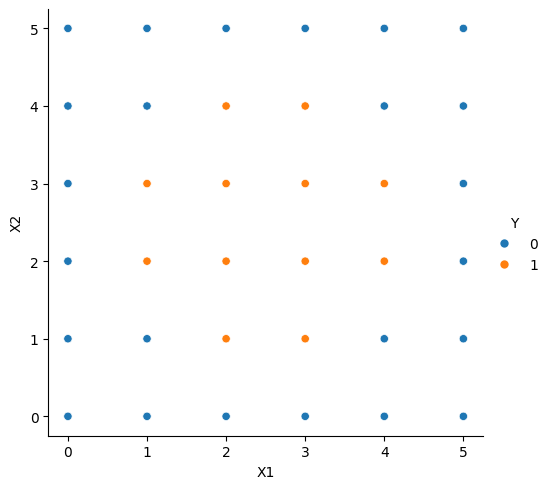

In [4]:
sns.relplot(x="X1", y="X2", hue="Y", data=df);

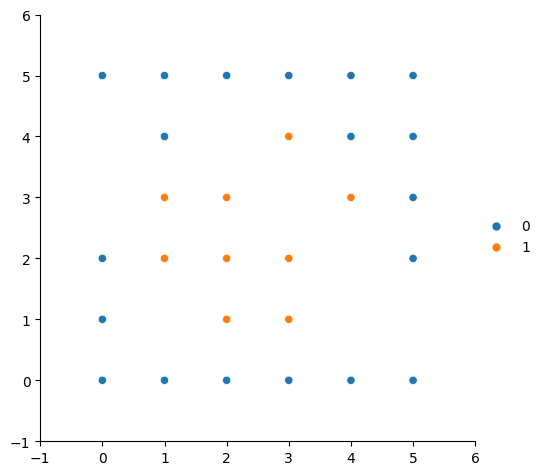

In [5]:
from sklearn.model_selection import train_test_split

X = df[['X1', 'X2']].to_numpy()
y = df['Y'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7, stratify=y)
g = sns.relplot(x=X_train[:,0], y=X_train[:,1], hue=y_train)
g.set(ylim=(-1, 6))
g.set(xlim=(-1, 6))

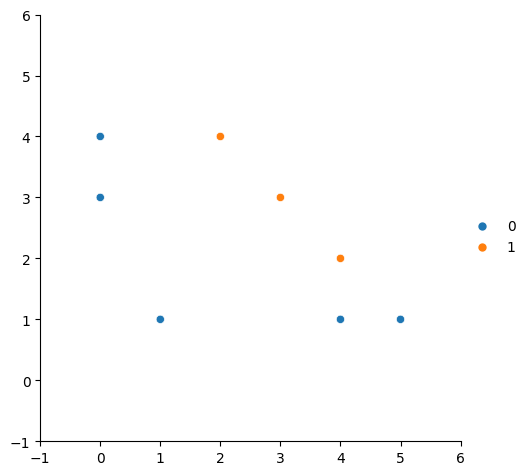

In [6]:
g = sns.relplot(x=X_test[:,0], y=X_test[:,1], hue=y_test)
g.set(ylim=(-1, 6))
g.set(xlim=(-1, 6))

### Logistic Regression

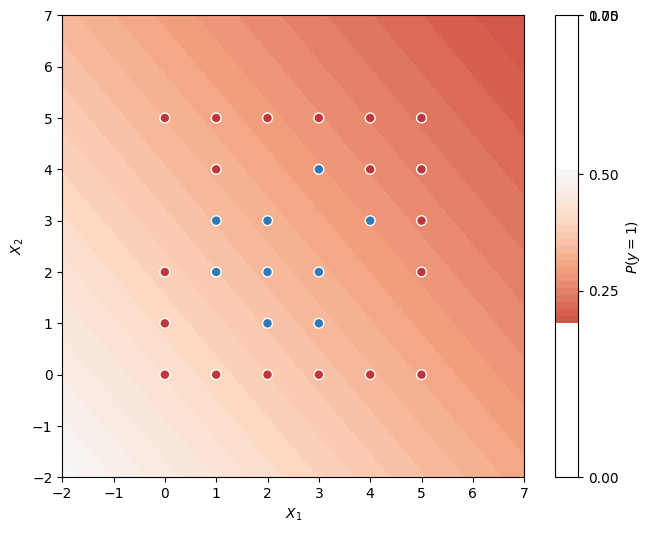

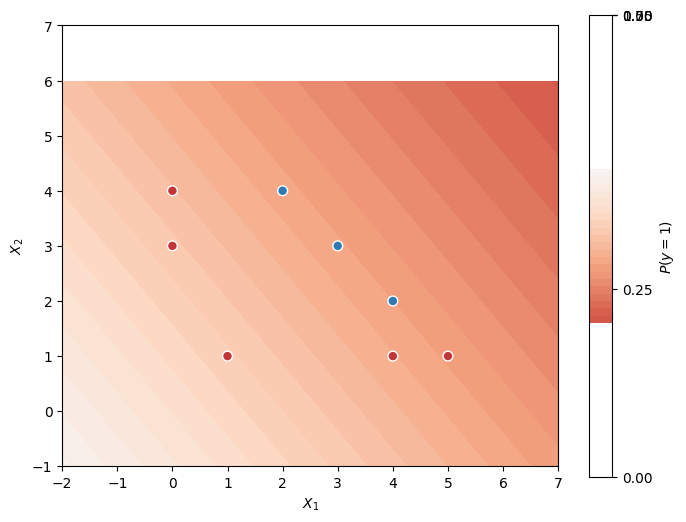

In [7]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(X_train, y_train)
plot_decision_boundary(X_train, y_train, clf)
plot_decision_boundary(X_test, y_test, clf)

<Axes: >

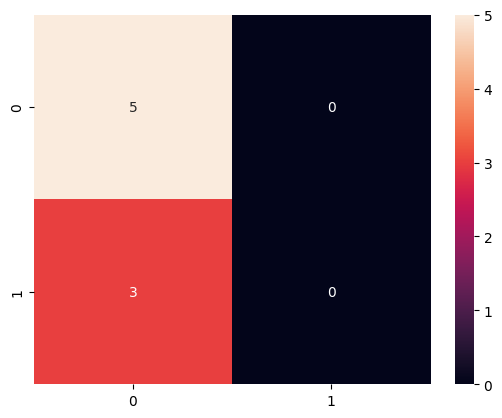

In [8]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [9]:
a = accuracy_score(y_test, y_pred)
p = precision_score(y_test, y_pred)
r = recall_score(y_test, y_pred)
f = f1_score(y_test, y_pred)
m = matthews_corrcoef(y_test, y_pred)

print(f'Acc {a}\nPre {p}\nRec {r}\nF1  {f}\nMCC {m}')

Acc 0.625
Pre 0.0
Rec 0.0
F1  0.0
MCC 0.0


/home/mantunes/git/aas/venv/lib64/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


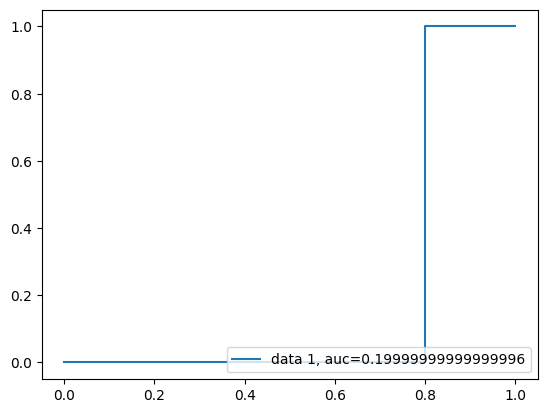

In [10]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Naive Bayes

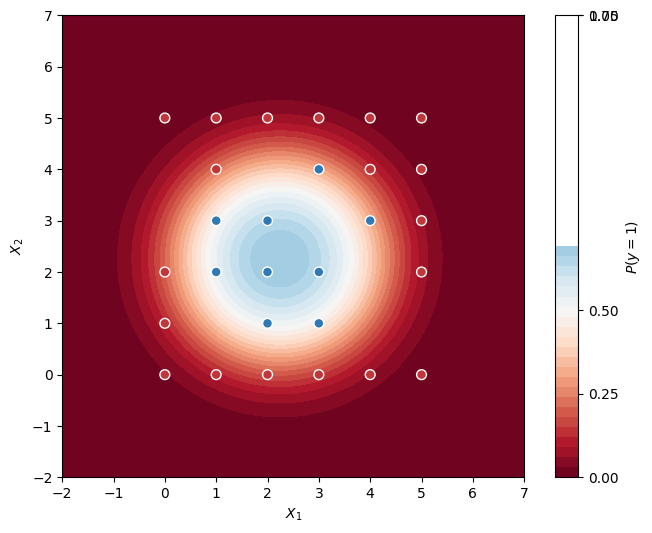

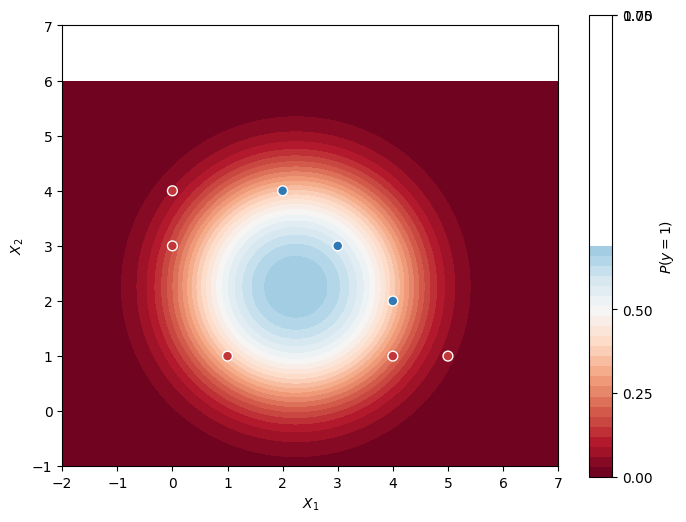

In [11]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB().fit(X_train,y_train)
plot_decision_boundary(X_train, y_train, clf)
plot_decision_boundary(X_test, y_test, clf)

<Axes: >

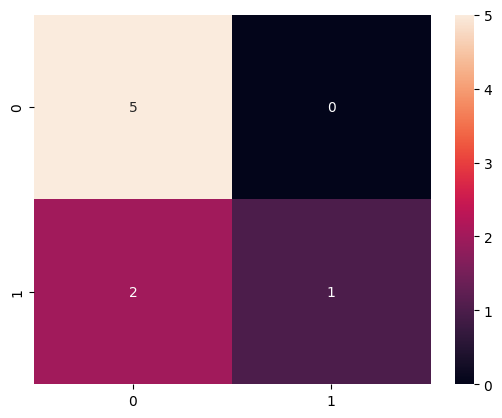

In [12]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [13]:
a = accuracy_score(y_test, y_pred)
p = precision_score(y_test, y_pred)
r = recall_score(y_test, y_pred)
f = f1_score(y_test, y_pred)
m = matthews_corrcoef(y_test, y_pred)

print(f'Acc {a}\nPre {p}\nRec {r}\nF1  {f}\nMCC {m}')

Acc 0.75
Pre 1.0
Rec 0.3333333333333333
F1  0.5
MCC 0.4879500364742666


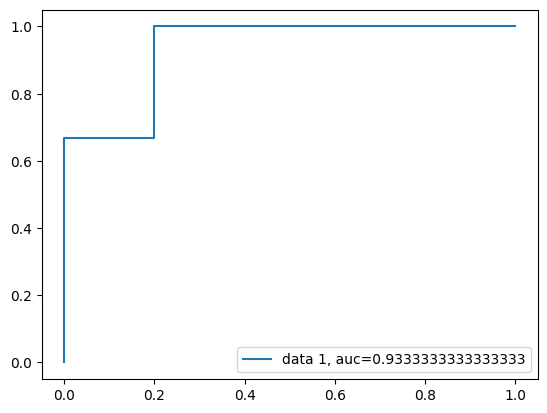

In [14]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### SVM



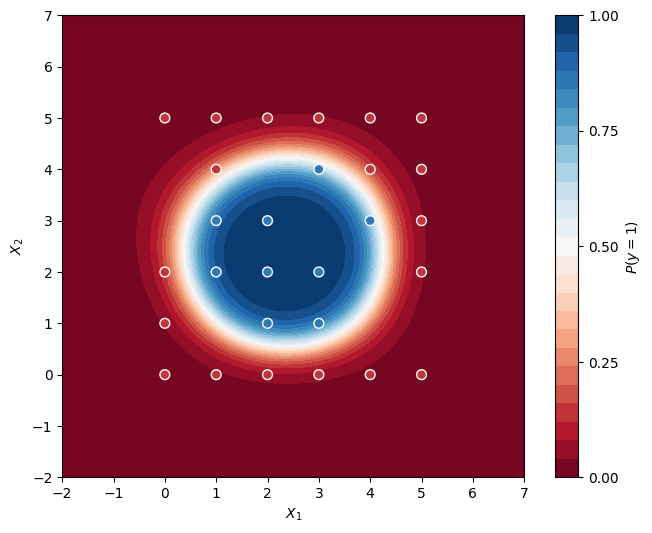

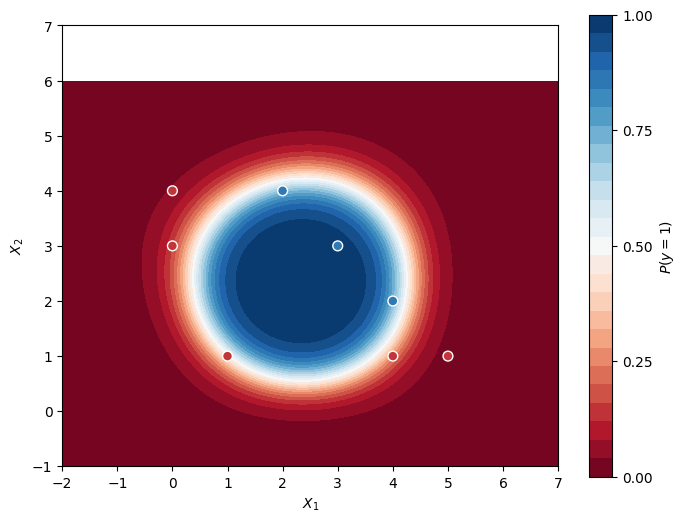

In [15]:
from sklearn.svm import SVC

clf = SVC(probability=True, kernel='rbf').fit(X_train,y_train)
plot_decision_boundary(X_train, y_train, clf)
plot_decision_boundary(X_test, y_test, clf)

<Axes: >

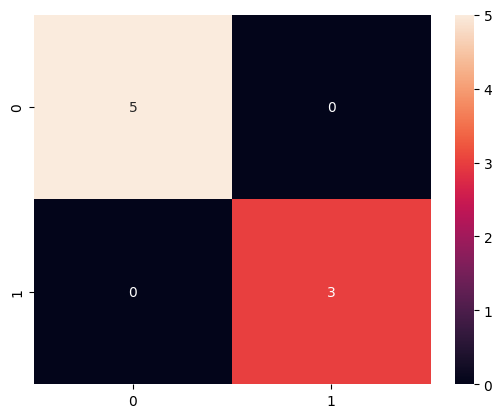

In [16]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [17]:
a = accuracy_score(y_test, y_pred)
p = precision_score(y_test, y_pred)
r = recall_score(y_test, y_pred)
f = f1_score(y_test, y_pred)
m = matthews_corrcoef(y_test, y_pred)

print(f'Acc {a}\nPre {p}\nRec {r}\nF1  {f}\nMCC {m}')

Acc 1.0
Pre 1.0
Rec 1.0
F1  1.0
MCC 1.0


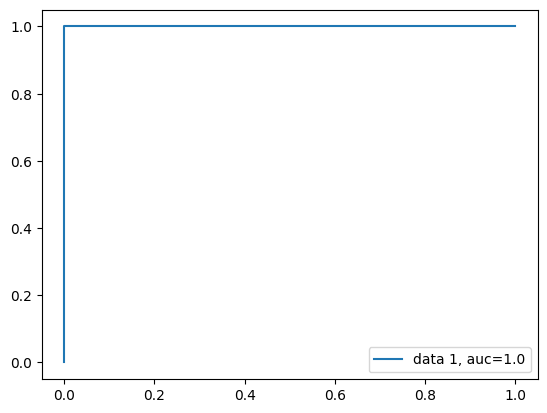

In [18]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Neural Network

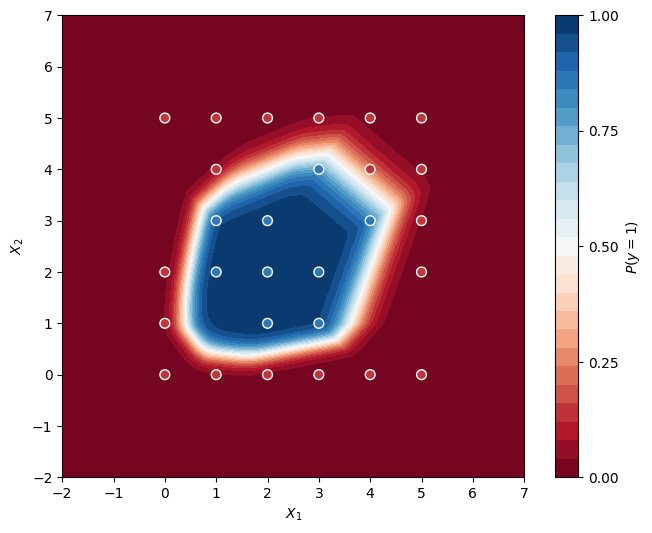

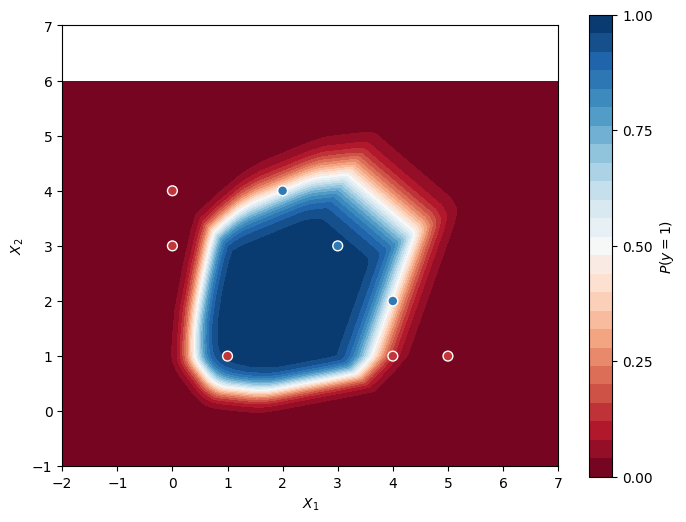

In [19]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=7, max_iter=5000).fit(X_train,y_train)
plot_decision_boundary(X_train, y_train, clf)
plot_decision_boundary(X_test, y_test, clf)

<Axes: >

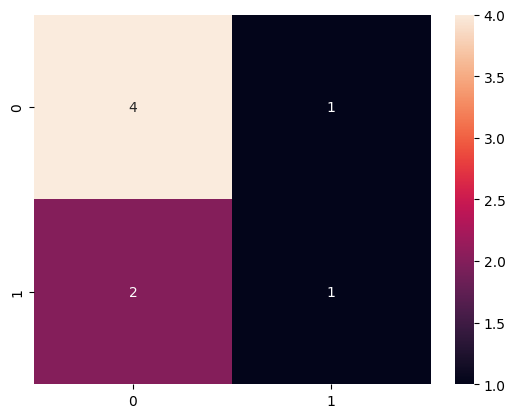

In [20]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [21]:
a = accuracy_score(y_test, y_pred)
p = precision_score(y_test, y_pred)
r = recall_score(y_test, y_pred)
f = f1_score(y_test, y_pred)
m = matthews_corrcoef(y_test, y_pred)

print(f'Acc {a}\nPre {p}\nRec {r}\nF1  {f}\nMCC {m}')

Acc 0.625
Pre 0.5
Rec 0.3333333333333333
F1  0.4
MCC 0.14907119849998599


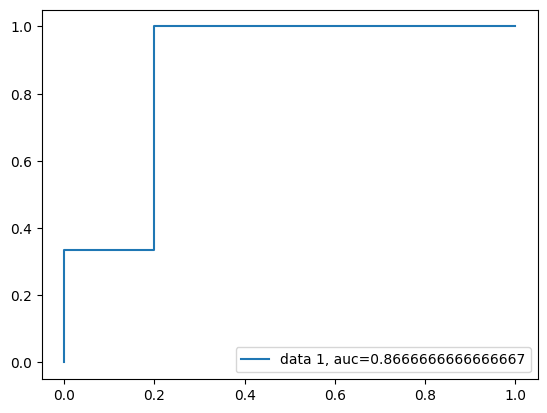

In [22]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### KNN

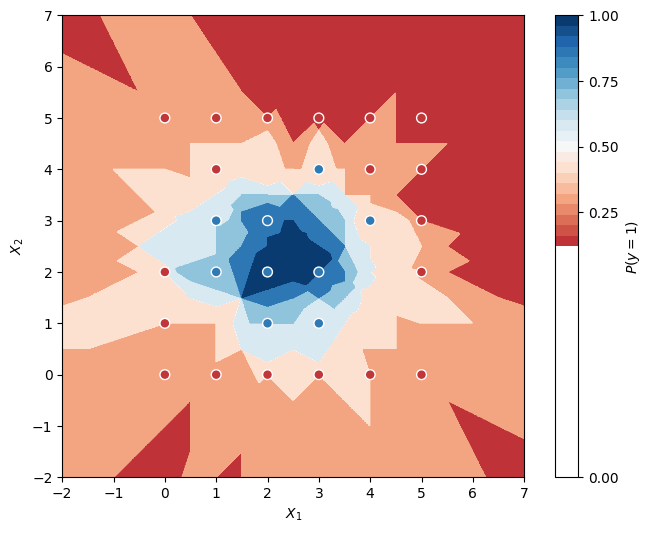

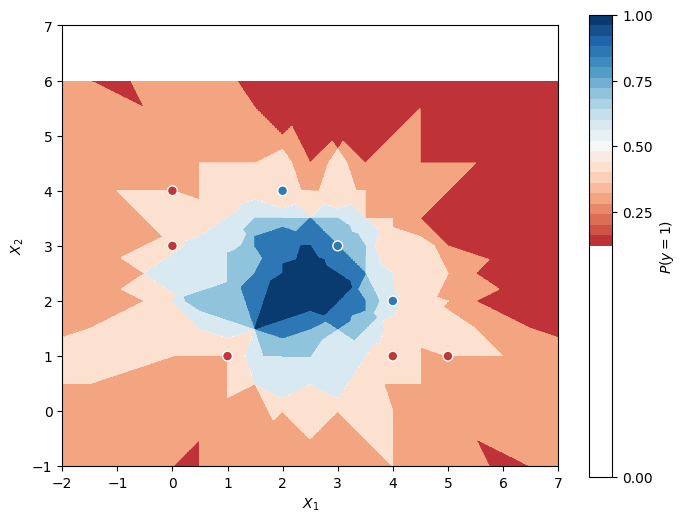

In [23]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=7).fit(X_train,y_train)
plot_decision_boundary(X_train, y_train, clf)
plot_decision_boundary(X_test, y_test, clf)

<Axes: >

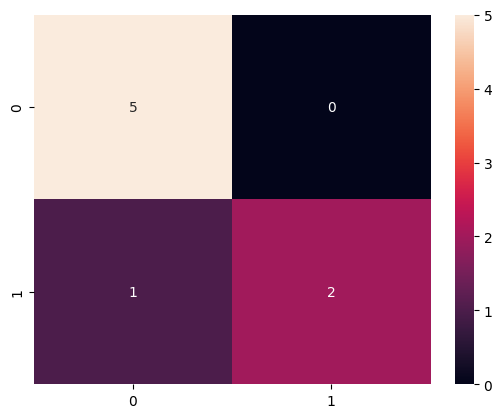

In [24]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [25]:
a = accuracy_score(y_test, y_pred)
p = precision_score(y_test, y_pred)
r = recall_score(y_test, y_pred)
f = f1_score(y_test, y_pred)
m = matthews_corrcoef(y_test, y_pred)

print(f'Acc {a}\nPre {p}\nRec {r}\nF1  {f}\nMCC {m}')

Acc 0.875
Pre 1.0
Rec 0.6666666666666666
F1  0.8
MCC 0.7453559924999299


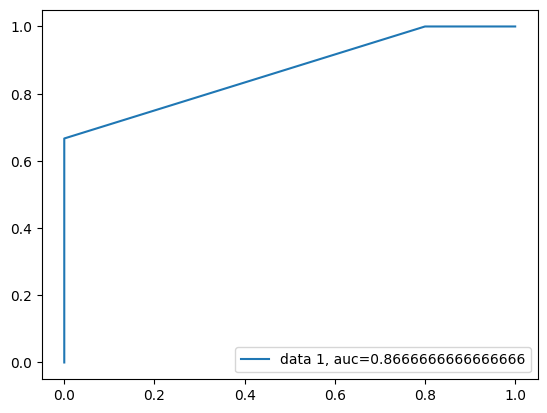

In [26]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Decision Trees

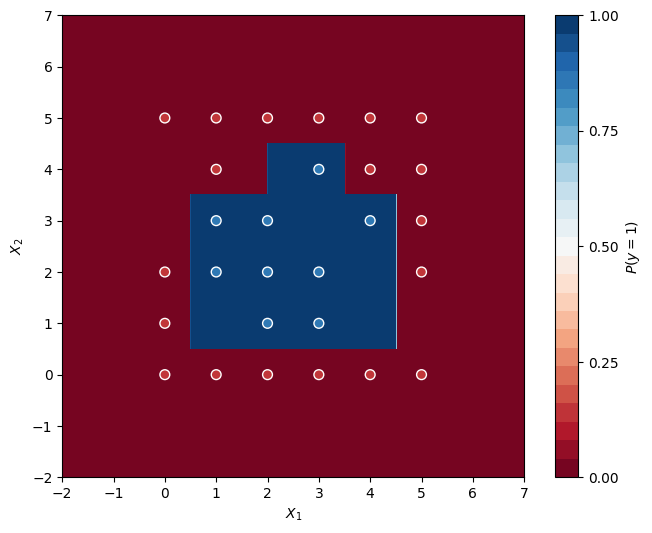

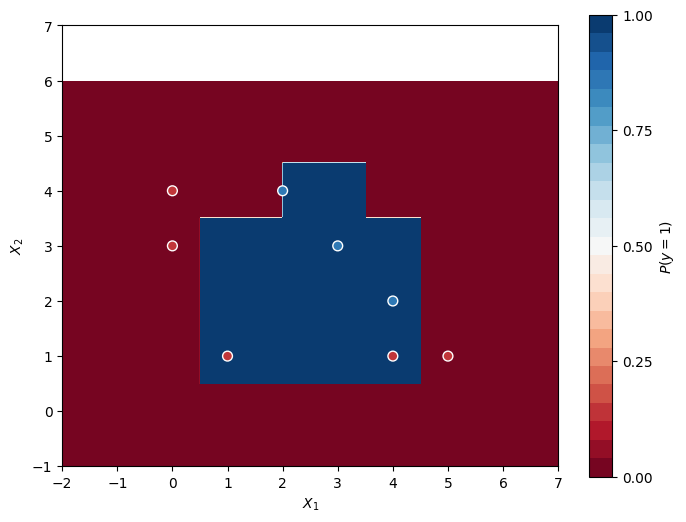

In [27]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(X_train,y_train)
plot_decision_boundary(X_train, y_train, clf)
plot_decision_boundary(X_test, y_test, clf)

<Axes: >

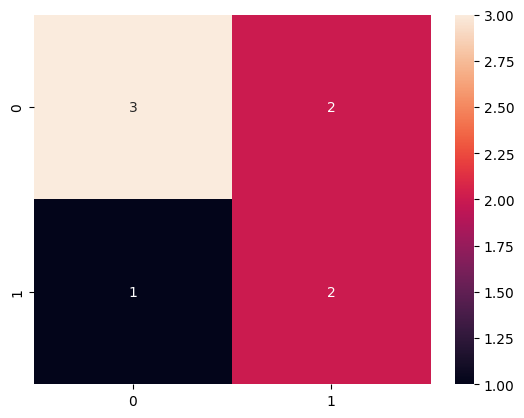

In [28]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [29]:
a = accuracy_score(y_test, y_pred)
p = precision_score(y_test, y_pred)
r = recall_score(y_test, y_pred)
f = f1_score(y_test, y_pred)
m = matthews_corrcoef(y_test, y_pred)

print(f'Acc {a}\nPre {p}\nRec {r}\nF1  {f}\nMCC {m}')

Acc 0.625
Pre 0.5
Rec 0.6666666666666666
F1  0.5714285714285714
MCC 0.2581988897471611


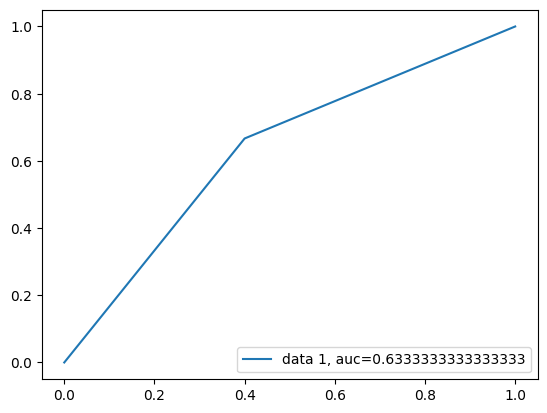

In [30]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Random Forest

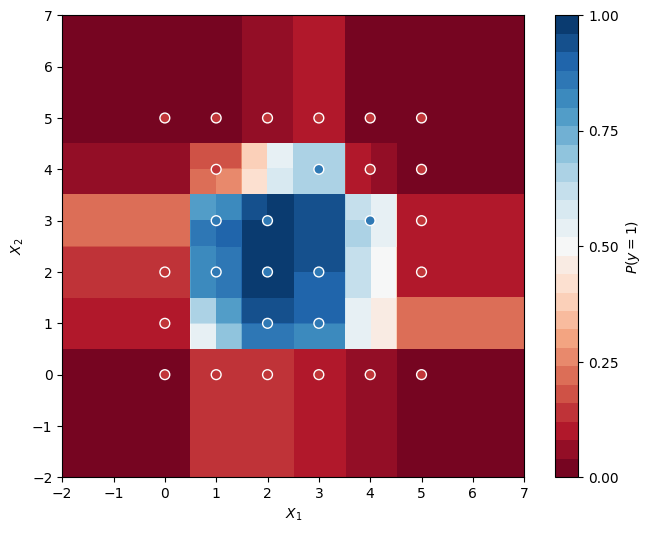

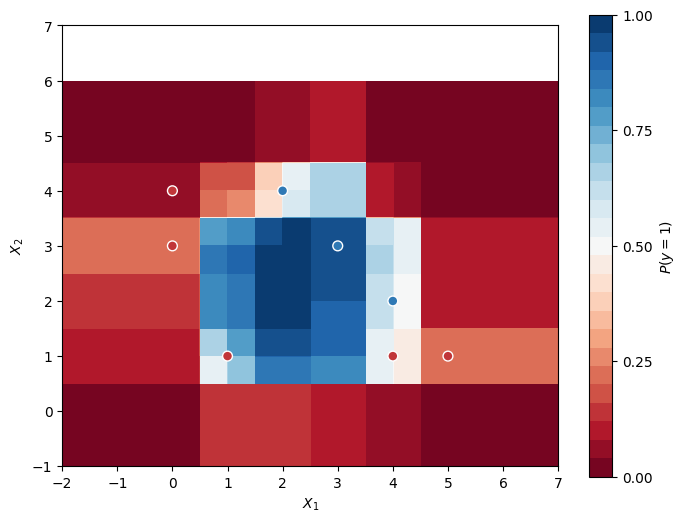

In [31]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=0).fit(X_train,y_train)
plot_decision_boundary(X_train, y_train, clf)
plot_decision_boundary(X_test, y_test, clf)

<Axes: >

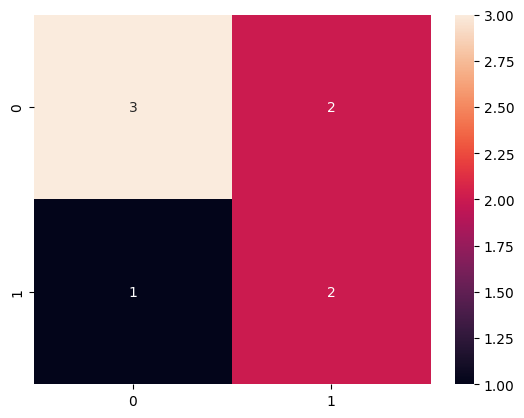

In [32]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [33]:
a = accuracy_score(y_test, y_pred)
p = precision_score(y_test, y_pred)
r = recall_score(y_test, y_pred)
f = f1_score(y_test, y_pred)
m = matthews_corrcoef(y_test, y_pred)

print(f'Acc {a}\nPre {p}\nRec {r}\nF1  {f}\nMCC {m}')

Acc 0.625
Pre 0.5
Rec 0.6666666666666666
F1  0.5714285714285714
MCC 0.2581988897471611


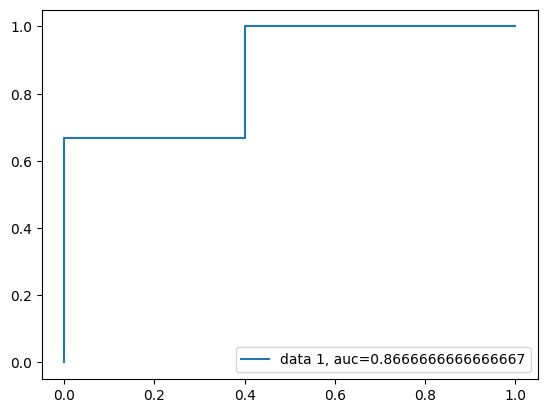

In [34]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Gradient Boosting

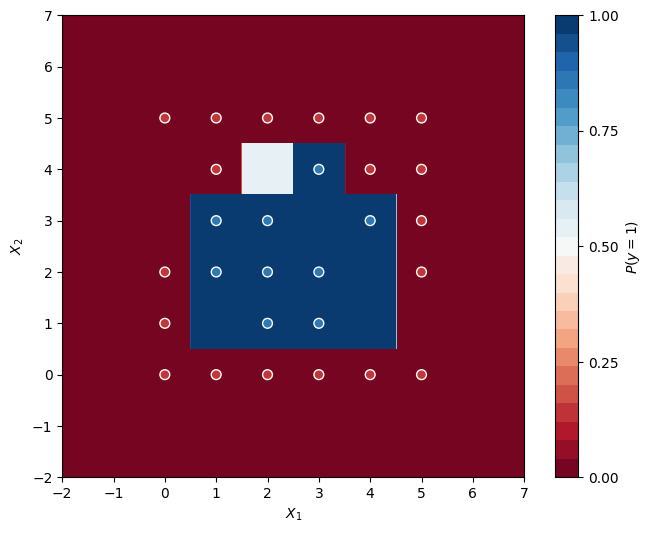

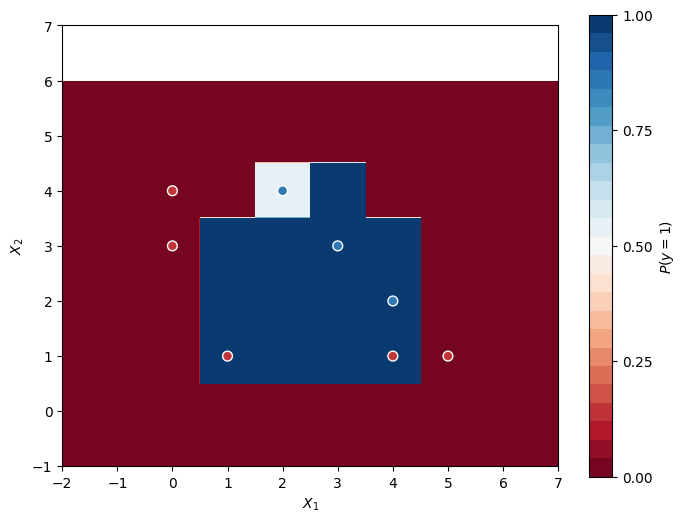

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(random_state=0).fit(X_train,y_train)
plot_decision_boundary(X_train, y_train, clf)
plot_decision_boundary(X_test, y_test, clf)

<Axes: >

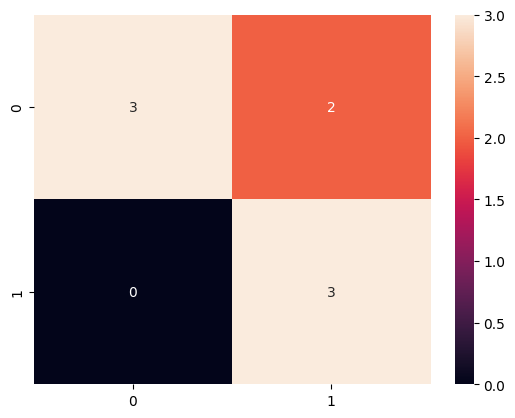

In [36]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [37]:
a = accuracy_score(y_test, y_pred)
p = precision_score(y_test, y_pred)
r = recall_score(y_test, y_pred)
f = f1_score(y_test, y_pred)
m = matthews_corrcoef(y_test, y_pred)

print(f'Acc {a}\nPre {p}\nRec {r}\nF1  {f}\nMCC {m}')

Acc 0.75
Pre 0.6
Rec 1.0
F1  0.75
MCC 0.6


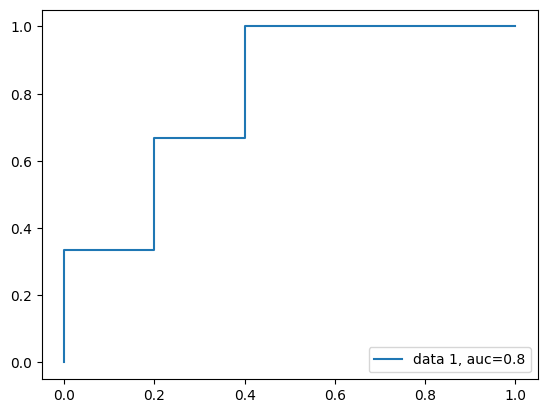

In [38]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Voting Ensemble

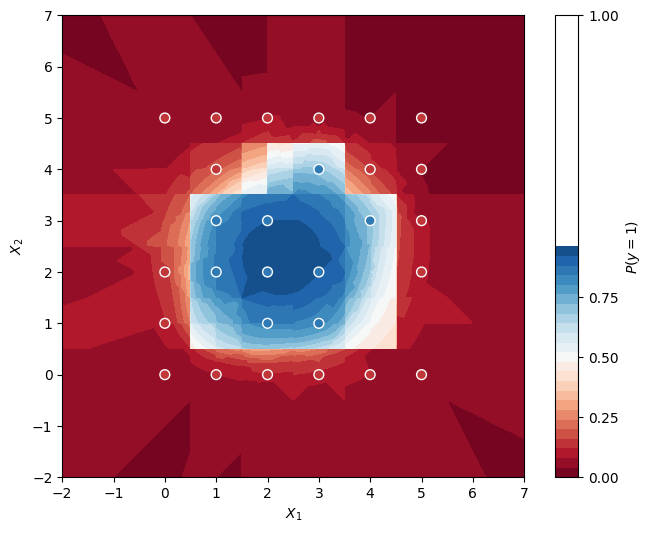

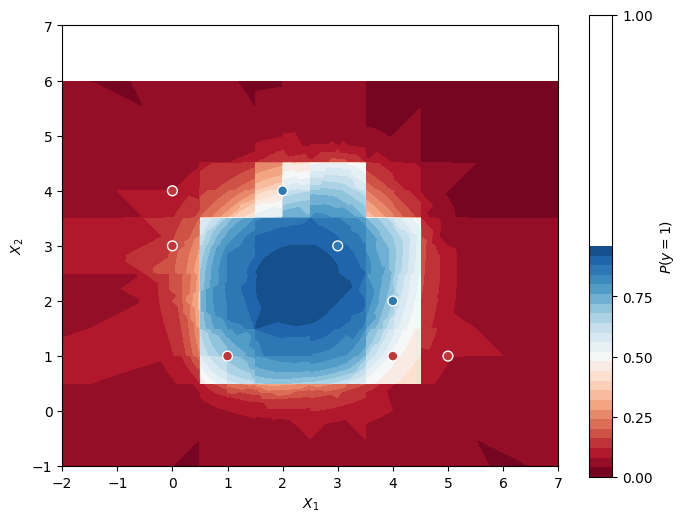

In [39]:
from sklearn.ensemble import VotingClassifier

#c1 = LogisticRegression()
c2 = GaussianNB()
c3 = SVC(probability=True, kernel='rbf')
c4 = MLPClassifier(random_state=7, max_iter=5000)
c5 = KNeighborsClassifier(n_neighbors=7)
c6 = DecisionTreeClassifier()
c7 = RandomForestClassifier(random_state=42)
c8 = GradientBoostingClassifier(random_state=42)

clfs = [('nb', c2), ('svm', c3), ('nn', c4),
        ('knn', c5), ('dt', c6), ('rf', c7), ('gbc', c8)]

clf = VotingClassifier(clfs, voting='soft').fit(X_train,y_train)
plot_decision_boundary(X_train, y_train, clf)
plot_decision_boundary(X_test, y_test, clf)

<Axes: >

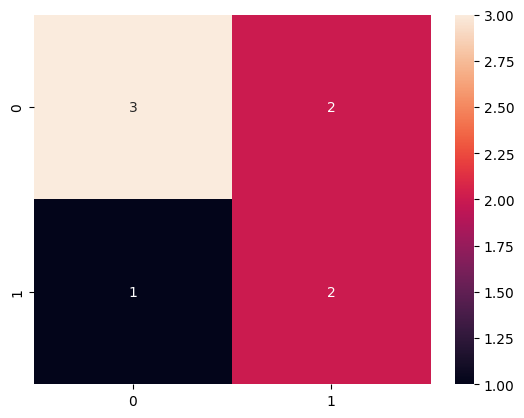

In [40]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [41]:
a = accuracy_score(y_test, y_pred)
p = precision_score(y_test, y_pred)
r = recall_score(y_test, y_pred)
f = f1_score(y_test, y_pred)
m = matthews_corrcoef(y_test, y_pred)

print(f'Acc {a}\nPre {p}\nRec {r}\nF1  {f}\nMCC {m}')

Acc 0.625
Pre 0.5
Rec 0.6666666666666666
F1  0.5714285714285714
MCC 0.2581988897471611


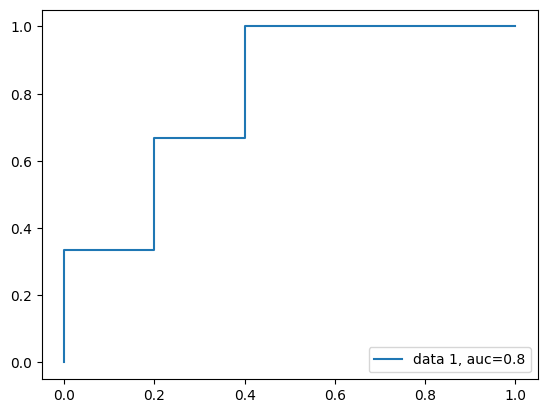

In [42]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()